In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# from Ipython.display import clear_output
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [2]:
data = pd.read_csv("dataset_factbookv3.csv", delimiter= ";")
data.head()

,Country,Area,Birth rate,Current account balance,Death rate,Electricity consumption,Electricity production,Exports,GDP,GDP per capita,...,Life expectancy at birth,Military expenditures,Natural gas consumption,Oil consumption,Population,Public debt,Railways,Reserves of foreign exchange & gold,Total fertility rate,Unemployment rate
0,Japan,377835,9.47,170200000000,8.95,971000000000,1044000000000,538800000000,3745000000000,29400,...,81.15,1.00,80420000000,5290000,127417244,164.3,23705,664600000000,1.39,4.7
1,Germany,357021,8.33,73590000000,10.55,519500000000,560000000000,893300000000,2362000000000,28700,...,78.65,1.50,99550000000,2891000,82431390,65.8,46039,96840000000,1.39,10.6
2,Saudi Arabia,1960582,29.56,51500000000,2.62,128500000000,138200000000,113000000000,310200000000,12000,...,75.46,10.00,56400000000,1550000,26417599,75,1392,23620000000,4.05,25.0
3,Russia,17075200,9.80,46040000000,14.52,894300000000,915000000000,162500000000,1408000000000,9800,...,67.10,,405800000000,2310000,143420309,28.2,87157,124500000000,1.27,8.3
4,Switzerland,41290,9.77,40950000000,8.48,54530000000,63470000000,130700000000,251900000000,33800,...,80.39,1.00,3093000000,290400,7489370,57.2,4533,69580000000,1.42,3.4


In [3]:
features = ["Exports", "Imports", "Industrial production growth rate","Investment","Unemployment rate"]

In [4]:
data = data.dropna (subset = features)
data.head()

,Country,Area,Birth rate,Current account balance,Death rate,Electricity consumption,Electricity production,Exports,GDP,GDP per capita,...,Life expectancy at birth,Military expenditures,Natural gas consumption,Oil consumption,Population,Public debt,Railways,Reserves of foreign exchange & gold,Total fertility rate,Unemployment rate
0,Japan,377835,9.47,170200000000,8.95,971000000000,1044000000000,538800000000,3745000000000,29400,...,81.15,1.00,80420000000,5290000,127417244,164.3,23705,664600000000,1.39,4.7
1,Germany,357021,8.33,73590000000,10.55,519500000000,560000000000,893300000000,2362000000000,28700,...,78.65,1.50,99550000000,2891000,82431390,65.8,46039,96840000000,1.39,10.6
2,Saudi Arabia,1960582,29.56,51500000000,2.62,128500000000,138200000000,113000000000,310200000000,12000,...,75.46,10.00,56400000000,1550000,26417599,75,1392,23620000000,4.05,25.0
3,Russia,17075200,9.80,46040000000,14.52,894300000000,915000000000,162500000000,1408000000000,9800,...,67.10,,405800000000,2310000,143420309,28.2,87157,124500000000,1.27,8.3
4,Switzerland,41290,9.77,40950000000,8.48,54530000000,63470000000,130700000000,251900000000,33800,...,80.39,1.00,3093000000,290400,7489370,57.2,4533,69580000000,1.42,3.4


In [5]:
dataf = data [features].copy()
dataf.head()

,Exports,Imports,Industrial production growth rate,Investment,Unemployment rate
0,538800000000,401800000000,6.6,24.0,4.7
1,893300000000,716700000000,2.2,17.6,10.6
2,113000000000,36210000000,2.8,17.2,25.0
3,162500000000,92910000000,6.4,19.1,8.3
4,130700000000,121100000000,4.7,20.4,3.4


In [6]:
#menscale data menjadi 1 - 10
dataf = (dataf - dataf.min ()) / ((dataf.max())- (dataf.min())) * 9 + 1
dataf.describe()

,Exports,Imports,Industrial production growth rate,Investment,Unemployment rate
count,116.000000,116.000000,116.000000,116.000000,116.000000
mean,1.748069,1.450576,4.345443,3.167522,2.685808
std,1.496091,1.076375,1.340742,1.299761,1.656152
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.029115,1.018583,3.571429,2.446147,1.647529
50%,1.127664,1.074623,4.011905,2.859895,2.183866
75%,1.711442,1.367922,4.880952,3.510070,3.066860
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [7]:
dataf.head()

,Exports,Imports,Industrial production growth rate,Investment,Unemployment rate
0,6.428214,3.448157,4.428571,3.521891,1.457849
1,10.000000,5.368819,3.380952,2.513135,2.229651
2,2.138041,1.218322,3.523810,2.450088,4.113372
3,2.636782,1.564151,4.380952,2.749562,1.928779
4,2.316379,1.736090,3.976190,2.954466,1.287791


In [8]:
#memilih titik random dari data yang ada , mengubahnya menjadi float dan menjadikanya centeroid
def centeroid (dataf,k):
    listcenteroid = []
    for i in range (k):
        centeroid =  dataf.apply (lambda x : float(x.sample()))
        listcenteroid.append(centeroid) 
    return pd.concat(listcenteroid, axis = 1)

hasilcenteroid = centeroid (dataf,3)
hasilcenteroid

,0,1,2
Exports,1.703382,1.390334,1.696530
Imports,1.099326,1.944075,1.003402
Industrial production growth rate,3.595238,3.476190,3.095238
Investment,5.507881,3.490368,2.213660
Unemployment rate,1.928779,1.693314,2.203488


In [9]:
#Fuction memberikan label
def label(dataf, hasilcenteroid):
#menentukan jarak titik ke centeroidnya
    jarakCenteroid = hasilcenteroid.apply(lambda x: np.sqrt(((dataf - x )**2).sum(axis=1)))
    return jarakCenteroid.idxmin (axis = 1)

hasilLabel = label(dataf,hasilcenteroid)
hasilLabel.head()
hasilLabel.value_counts()

1    56
2    49
0    11
dtype: int64

In [10]:
#mengupdate value dari centeroid nya
def centeroidBaru(dataf,hasilLabel,k):
    return dataf.groupby(hasilLabel).apply(lambda x: np.exp(np.log(x).mean())).T#mencari rata rata dari value dari row nya dan mengkalikan dengan e
#akan  menghasilkan overall value dari setiap cluster

In [11]:
def plotClustering (dataf,hasilLabel, hasilCenteroid,totalIterasi):
    pca = PCA (n_components = 2)
    data_2d = pca.fit_transform (dataf)
    centeroid_2d = pca.transform (hasilCenteroid.T)
    # clear_output (wait=True)
    plt.title(f'Iterasi {totalIterasi}')
    plt.scatter (x = data_2d[:,0], y = data_2d[:,1], c = hasilLabel)
    plt.scatter (x = centeroid_2d[:,0], y = centeroid_2d[:,1])
    plt.show()

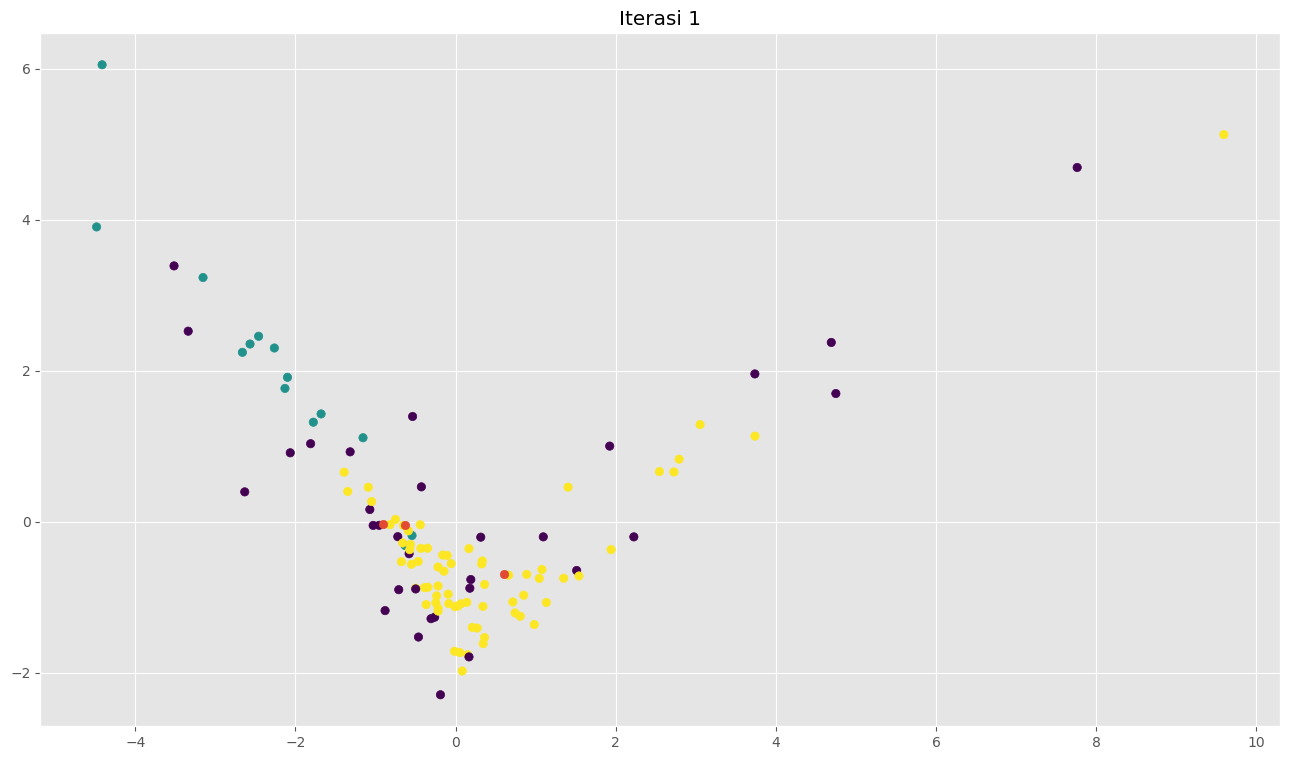

In [13]:
iterasiMax = 100
k = 3

titikCenteroid = centeroid(dataf, k)
centeroidLama = pd.DataFrame()
iterasi = 1

while iterasi < iterasiMax and not titikCenteroid.equals(centeroidLama) :
    centeroidLama = titikCenteroid
    labeldata = label(dataf, titikCenteroid) 
    centeroids = centeroidBaru(dataf,hasilLabel,k)
    plotClustering(dataf,labeldata,centeroids,iterasi)
    iterasi += 1